<a href="https://colab.research.google.com/github/Varsha-KML/Health-Data-Analysis-using-EDA/blob/main/Capstone1_Health_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #mount the drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1.import NumPy library
import numpy as np
import matplotlib.pyplot as plt # imports the pyplot module from the matplot library to create plots abd graph

female = np.genfromtxt('/content/drive/MyDrive/Capstoneprjt1/nhanes_adult_female_bmx_2020.csv', delimiter=',', skip_header=1) # reads the csv file and stores the data in NumPy
male = np.genfromtxt('/content/drive/MyDrive/Capstoneprjt1/nhanes_adult_male_bmx_2020.csv', delimiter=',', skip_header=1) #delimiter- defines values in the files ara seperated by commas, Skip_header-skips the first row that contains column names

print("Male shape:", male.shape)#print the shape and tells no of rows and columns
print("Female shape:", female.shape)

Male shape: (4082, 7)
Female shape: (4222, 7)


In [ ]:
# 2.rename the column names
column_names = [
    "Weight(kg)",
    "Standing height(cm)",
    "Upper arm length(cm)",
    "Upper Leg length(cm)",
    "Arm circumferences(cm)",
    "Hip circumferences(cm)",
    "Waist circumferences(cm)"
]

In [ ]:
import pandas as pd
df_male = pd.DataFrame(male, columns=column_names)
df_female = pd.DataFrame(female, columns=column_names)
df_male.head()
df_female.head()

,Weight(kg),Standing height(cm),Upper arm length(cm),Upper Leg length(cm),Arm circumferences(cm),Hip circumferences(cm),Waist circumferences(cm)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97.1,160.2,34.7,40.8,35.8,126.1,117.9
2,91.1,152.7,33.5,33.0,38.5,125.5,103.1
3,73.0,161.2,37.4,38.0,31.8,106.2,92.0
4,61.7,157.4,38.0,34.7,29.0,101.0,90.5


In [ ]:
# checking if there any NaN values
print("Female NaN count:", np.isnan(female).sum())
print("Male NaN count:", np.isnan(male).sum())

Female NaN count: 0
Male NaN count: 0


In [ ]:
#removing rows with NaNs
female = female[~np.isnan(female).any(axis=1)]
male = male[~np.isnan(male).any(axis=1)]

In [ ]:
# 3.Drawing histograms of weight of male and female
# Extract the weight column
female_weights = female[:, 0]
male_weights = male[:, 0]

In [ ]:
# Calculate min & max weights to decide a common axis
print("Female weight range:", female_weights.min(), "to", female_weights.max())
print("Male weight range:", male_weights.min(), "to", male_weights.max())

Female weight range: 32.6 to 180.9
Male weight range: 36.8 to 204.6


In [ ]:
# Based on this output we can put x_min & x_max at this range
x_min = 30
x_max = 210

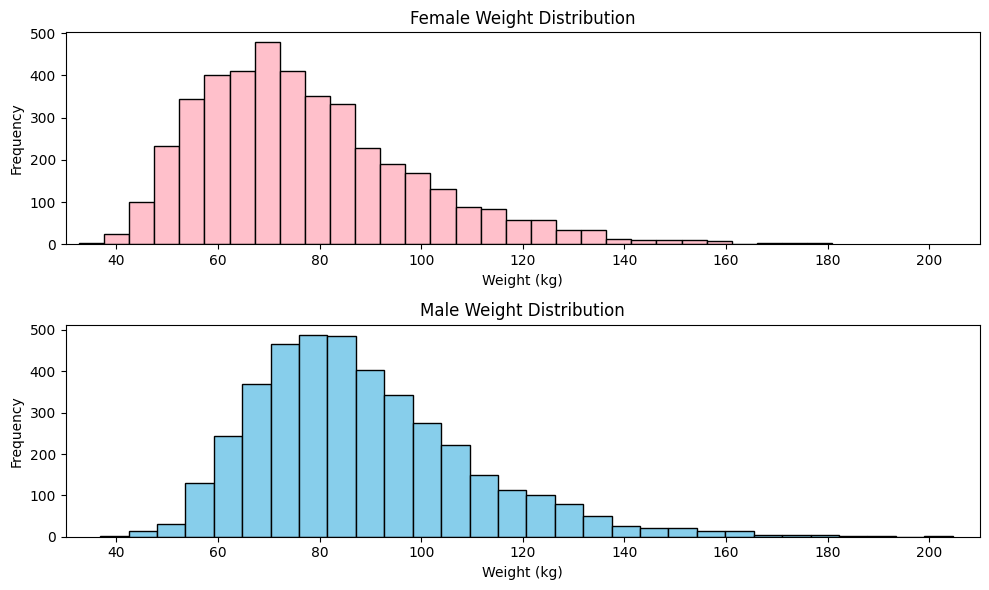

In [ ]:
plt.figure(figsize=(10, 6)) # Sets the width and height of the plot

# Female Histogram (top)
plt.subplot(2, 1, 1) #Plots first histogram
plt.hist(female_weights, bins=30, color='pink', edgecolor='black') # bins= breaks the data into intervals, color=gives pink color, edgecolor=outlines each bar
plt.title("Female Weight Distribution")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.xlim(30, 210)# range of x-axis

# Male Histogram (bottom)
plt.subplot(2, 1, 2) #Plots second histogram
plt.hist(male_weights, bins=30, color='skyblue', edgecolor='black')
plt.title("Male Weight Distribution")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.xlim(30, 210)

# Adjust layout and show the output histogram
plt.tight_layout()
plt.show()

/tmp/ipython-input-55-1477435015.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=["Female", "Male"], patch_artist=True)


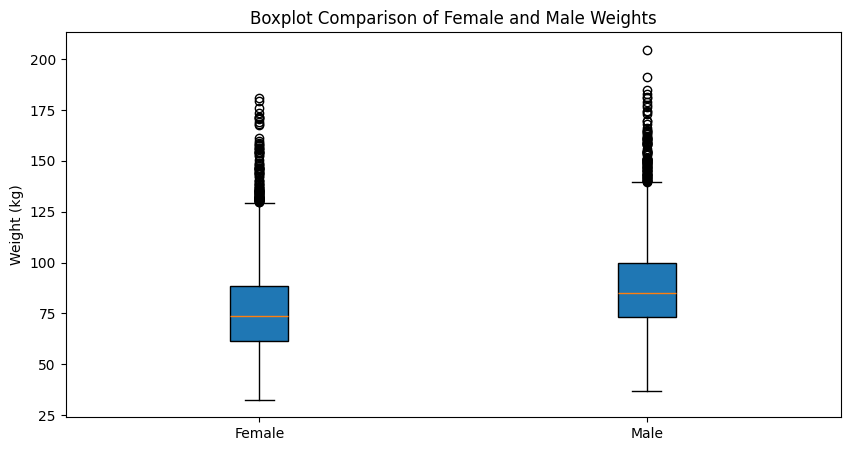

In [ ]:
# 4.Box-and-Whisker plot to compare male and female weights
plt.figure(figsize=(10, 5)) # sets the size of the plot

# Boxplot of female and male weights side by side
plt.boxplot([female_weights, male_weights], labels=["Female", "Male"], patch_artist=True) #plt.boxplot-draw box plot of two sets od weights, patch_artist-add color to the boxes

# Title and labels
plt.title("Boxplot Comparison of Female and Male Weights")
plt.ylabel("Weight (kg)")

plt.show()

In [ ]:
# 5.Computing the basic numerical aggregates of weights
from scipy.stats import skew # Load tools to check shape of the data

# Female statistics
print(" Female Weight Statistics:")
print("Mean:", np.mean(female_weights))         # Average weight
print("Median:", np.median(female_weights))     # Middle value when sorted
print("Standard Deviation:", np.std(female_weights))  # Spread of values
print("Minimum:", np.min(female_weights))       # Smallest weight
print("Maximum:", np.max(female_weights))       # Largest weight
print("Range:", np.max(female_weights) - np.min(female_weights))  # Max - Min
print("Skewness:", skew(female_weights))        # Asymmetry of data

# Male statistics
print("\n Male Weight Statistics:")
print("Mean:", np.mean(male_weights))
print("Median:", np.median(male_weights))
print("Standard Deviation:", np.std(male_weights))
print("Minimum:", np.min(male_weights))
print("Maximum:", np.max(male_weights))
print("Range:", np.max(male_weights) - np.min(male_weights))
print("Skewness:", skew(male_weights))



 Female Weight Statistics:
Mean: 77.40379057095475
Median: 73.6
Standard Deviation: 21.54250829019315
Minimum: 32.6
Maximum: 180.9
Range: 148.3
Skewness: 1.03336107186799

 Male Weight Statistics:
Mean: 88.36454300416565
Median: 85.0
Standard Deviation: 21.418936717962495
Minimum: 36.8
Maximum: 204.6
Range: 167.8
Skewness: 0.9842810741662347


In [ ]:
# Here, from the female weight statistics, Skewness=1.03 which is greater than zero. Therefore, it is right skewed
#from the male weight statistics, Skewness=0.98 which is less than zero. Therefore, it is left skewed

In [ ]:
# 6. Adding a new column to female matrix which contain Body Mass Index(bmi)
# bmi = weight(kg)/(height(m))^2, convert cm to m
#  Extract weight and height columns
weights = female[:, 0]           # Column 0 = weight (kg)
heights_cm = female[:, 1]        # Column 1 = height (cm)

#  Convert height from cm to meters
heights_m = heights_cm / 100     # Now in meters

#  Calculate bmi
bmi = weights / (heights_m ** 2)

#  Add bmi as a new (8th) column to the female matrix
female = np.column_stack((female, bmi))

In [ ]:
print("New shape of female matrix:", female.shape) # printind new data set of female with 8 columns
print("First 5 BMIs:", female[:5, 7])  #  checking column 7 = BMI

New shape of female matrix: (4221, 14)
First 5 BMIs: [37.83504078 39.06972037 28.09265496 24.90437849 23.17879132]


In [ ]:
# 7. Creating a new matrix zfemale , a standardized version of the female datas (convert each column into z-scores)
# this makes each column have mean = 0 and standard deviation = 1
from scipy.stats import zscore # load the bulit in function to calculate zscore
zfemale = zscore(female, axis=0) #axis-apply zscore column by column


In [ ]:
print("Shape of zfemale:", zfemale.shape) #checking the results
print("First row (z-scores):", zfemale[0])

Shape of zfemale: (4221, 11)
First row (z-scores): [ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
  1.11578462  0.9969677   1.11392881  0.48433775  0.9969677 ]


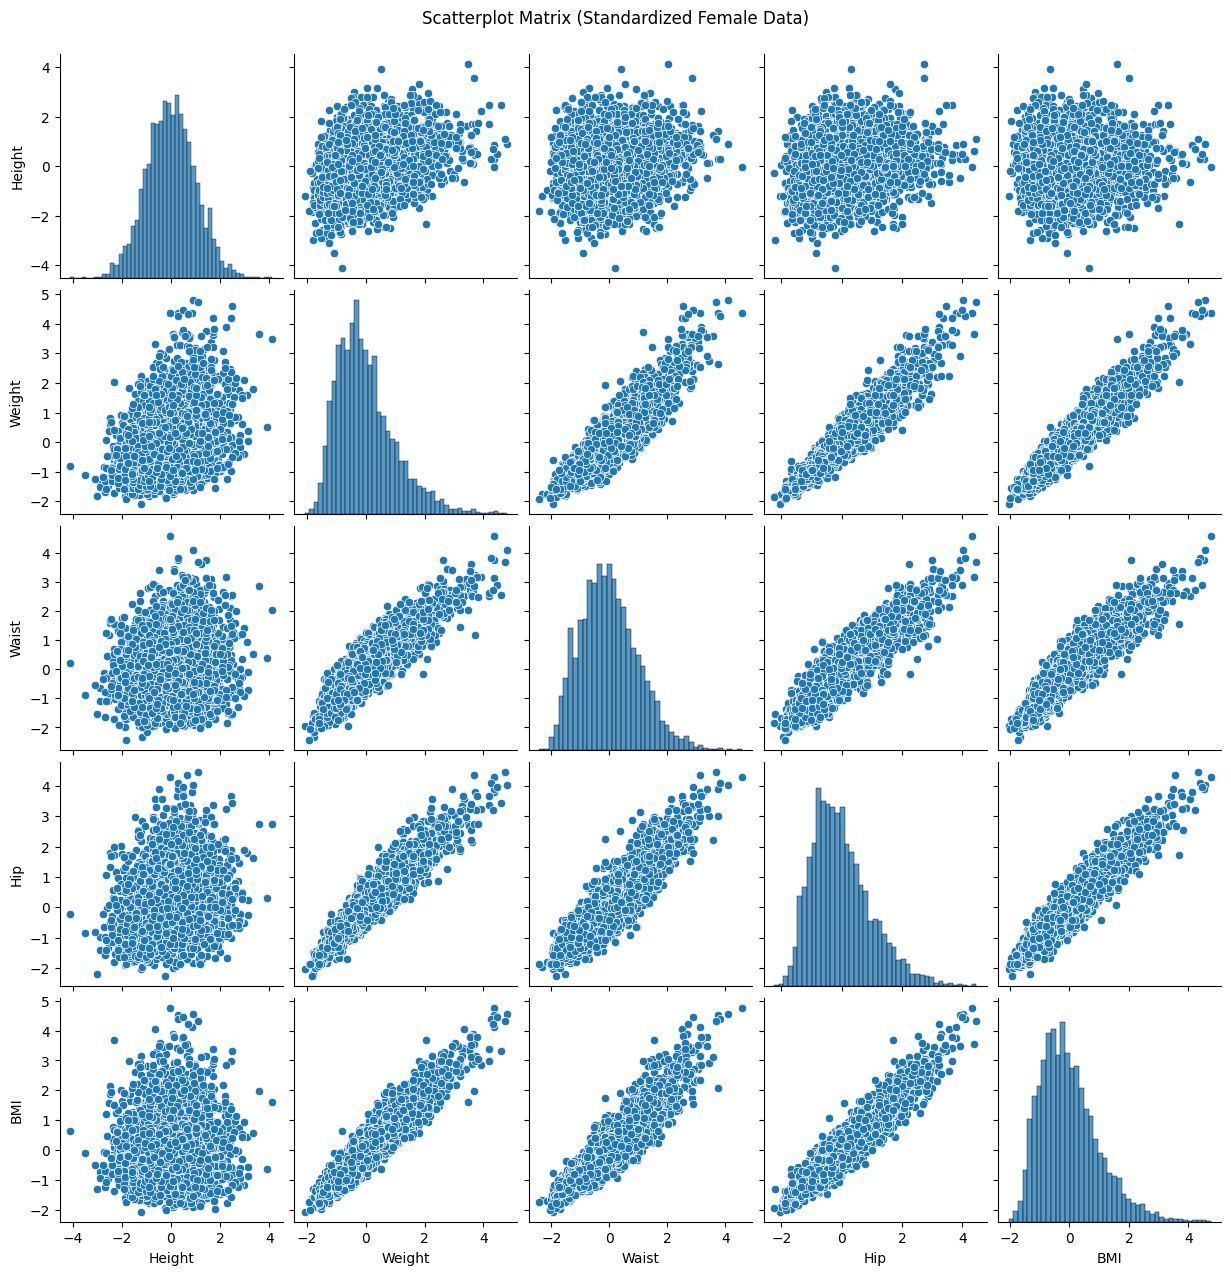

In [ ]:
# 8. Creating a scatterplot matrix of respective columns based on zfemale.
import pandas as pd
import seaborn as sns # Python libraray used for statistical visualization
df = pd.DataFrame(zfemale[:, [1,0,6,5,7]], columns=["Height", "Weight", "Waist", "Hip", "BMI"]) # create a new data frame using selected standardized columns
sns.pairplot(df)
plt.suptitle("Scatterplot Matrix (Standardized Female Data)", y=1.02)
plt.show()

In [ ]:
# Pearson correlation (linear relationships)
print("\n Pearson Correlation:")
print(df.corr(method='pearson')) #calculates a matrix showing how strongly variables are linearly related

# Spearman correlation (monotonic relationships, based on ranks)
print("\n Spearman Correlation:")
print(df.corr(method='spearman'))# finds rank-based (monotonic) relationships


 Pearson Correlation:
          Height    Weight     Waist       Hip       BMI
Height  1.000000  0.345496  0.126547  0.202895  0.033077
Weight  0.345496  1.000000  0.904550  0.946553  0.945900
Waist   0.126547  0.904550  1.000000  0.897407  0.921198
Hip     0.202895  0.946553  0.897407  1.000000  0.944199
BMI     0.033077  0.945900  0.921198  0.944199  1.000000

 Spearman Correlation:
          Height    Weight     Waist       Hip       BMI
Height  1.000000  0.338860  0.108587  0.205405  0.019897
Weight  0.338860  1.000000  0.900169  0.946634  0.937999
Waist   0.108587  0.900169  1.000000  0.888037  0.923114
Hip     0.205405  0.946634  0.888037  1.000000  0.934196
BMI     0.019897  0.937999  0.923114  0.934196  1.000000


In [ ]:
# 9.Compute teo health-related ratios for each participant
# For female participants
female_height = female[:, 1] #Extract the required columns
female_waist = female[:, 6]
female_hip = female[:, 5]

# Compute ratios
female_waist_height = female_waist / female_height
female_waist_hip = female_waist / female_hip

# Add these ratios as new columns to the female matrix
female = np.column_stack((female, female_waist_height, female_waist_hip))

# For male participants
male_height = male[:, 1]
male_waist = male[:, 6]
male_hip = male[:, 5]

# Compute ratios
male_waist_height = male_waist / male_height
male_waist_hip = male_waist / male_hip

# Add to male matrix
male = np.column_stack((male, male_waist_height, male_waist_hip))

In [ ]:
# Checking the new dataset
print("New shape of female matrix:", female.shape)
print("New shape of male matrix:", male.shape)

# Optional: show first 3 rows
print("First 3 female participants' ratios:\n", female[:3, -2:])
print("First 3 male participants' ratios:\n", male[:3, -2:])

New shape of female matrix: (4221, 8)
New shape of male matrix: (4081, 7)
First 3 female participants' ratios:
 [[117.9         37.83504078]
 [103.1         39.06972037]
 [ 92.          28.09265496]]
First 3 male participants' ratios:
 [[108.2 120.4]
 [ 94.5  86.8]
 [107.8 109.6]]


/tmp/ipython-input-67-1728783506.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True)


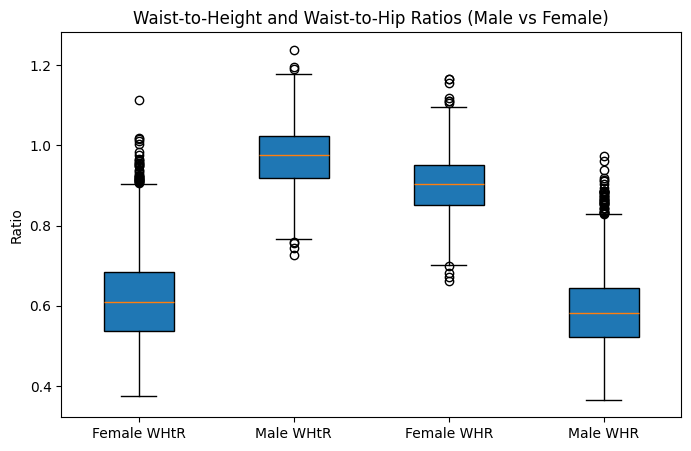

In [ ]:
# 10.Create a Box plot with 4 boxes side by side
# 2 boxes for waist to height ratio, 2 boxes for waist to hip ratio
# Female
female_waist_height = female[:, #extract the required columns
female_waist_hip = female[:, 9]

# Male
male_waist_height = male[:, 8]
male_waist_hip = male[:, 9]

import matplotlib.pyplot as plt

# Group the data into 4 categories
data = [female_waist_height, male_waist_height, female_waist_hip, male_waist_hip]

# Set the labels for the 4 boxes
labels = ["Female WHtR", "Male WHtR", "Female WHR", "Male WHR"]

# Create the boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(data, labels=labels, patch_artist=True)

# Add title and label
plt.title("Waist-to-Height and Waist-to-Hip Ratios (Male vs Female)")
plt.ylabel("Ratio")

plt.show()

In [ ]:
# 11. Print the standardized body measurements (from zfemale) for:female participants with the lowest BMI & 5 female participants with the highest BMI
sorted_indices = np.argsort(female[:, 7]) # get the sorted index positionsbased on bmi
lowest_bmi_indices = sorted_indices[:5] # first 5 = lowest bmi
highest_bmi_indices = sorted_indices[-5:] # last 5 = highest bmi
lowest_bmi_zdata = zfemale[lowest_bmi_indices] # using zfemale to get standardized measurements
highest_bmi_zdata = zfemale[highest_bmi_indices]
print("Standardized measurements for 5 females with lowest BMI:\n", lowest_bmi_zdata) # results
print("\n Standardized measurements for 5 females with highest BMI:\n", highest_bmi_zdata)


Standardized measurements for 5 females with lowest BMI:
 [[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028 -1.74538177 -0.87170621 -2.05024028 -1.74538177
  -0.87170621 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987 -2.04369083 -1.63576925 -1.99487987 -2.04369083
  -1.63576925 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383 -2.01516552 -0.98358297 -1.97088383 -2.01516552
  -0.98358297 -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591 -1.82748279 -0.07452609 -1.94177591 -1.82748279
  -0.07452609 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577 -1.87684602 -0.65912886 -1.89319577 -1.87684602
  -0.65912886 -1.89319577]]

 Standardized measurements for 5 females with highest BMI:
 [[ 4.24